In [2]:
pip install xgboost

In [3]:
pip install catboost

     |████████████████████████████████| 67.3MB 61kB/s 


In [4]:
pip install --upgrade xgboost

     |████████████████████████████████| 166.7MB 81kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [104]:
import numpy as np
import tensorflow as tf
import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from lightgbm import LGBMClassifier
import pandas as pd
import catboost
from catboost import Pool
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler



#Datasets

In [145]:
#Se cargan los datasets de entrenamiento y de test
train_data = pd.read_csv('train.csv', delimiter=",")
test_data = pd.read_csv('test.csv', delimiter=",")

#Se hace un pequeño preprocesamiento de los datos
X = train_data
Y = train_data['target'].str.replace("Class_", ' ') #Eliminar 'Class_' de la variable target para quedarse con el valor numerico
Y = Y.astype(int)
Y = Y-1
del X['target'] #aqui borrar features 3 4 8 17 21

#Split del dataset de training
seed = 12321
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


#XGBoost

In [95]:
#Se convierte el dataset de entrenamiento a una matriz con la que puede trabajar XGBoost
train_matrix = xgb.DMatrix(x_train, label=y_train)
test_matrix = xgb.DMatrix(x_test, label=y_test)
evallist = [(test_matrix, 'eval'), (train_matrix, 'train')]
#parametros del modelo
xgb_params = {
    'max_depth': 2, #profundidad del arbol
    'eta': 0.4,     #learning rate
    'booster':'gbtree',
    'alpha':1,      #regularizacion L1
    'gamma': 0.2,
    'min_child_weight': 2.38,   
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': 4 
    }

XGBModel = xgb.train(xgb_params, train_matrix, 200,evals=evallist)


[0]	eval-mlogloss:1.24880	train-mlogloss:1.24647
[1]	eval-mlogloss:1.18519	train-mlogloss:1.18109
[2]	eval-mlogloss:1.15305	train-mlogloss:1.14769
[3]	eval-mlogloss:1.13596	train-mlogloss:1.12974
[4]	eval-mlogloss:1.12667	train-mlogloss:1.11980
[5]	eval-mlogloss:1.12160	train-mlogloss:1.11413
[6]	eval-mlogloss:1.11851	train-mlogloss:1.11055
[7]	eval-mlogloss:1.11668	train-mlogloss:1.10824
[8]	eval-mlogloss:1.11555	train-mlogloss:1.10661
[9]	eval-mlogloss:1.11457	train-mlogloss:1.10535
[10]	eval-mlogloss:1.11395	train-mlogloss:1.10428
[11]	eval-mlogloss:1.11334	train-mlogloss:1.10341
[12]	eval-mlogloss:1.11271	train-mlogloss:1.10261
[13]	eval-mlogloss:1.11227	train-mlogloss:1.10191
[14]	eval-mlogloss:1.11169	train-mlogloss:1.10126
[15]	eval-mlogloss:1.11119	train-mlogloss:1.10053
[16]	eval-mlogloss:1.11068	train-mlogloss:1.09992
[17]	eval-mlogloss:1.11042	train-mlogloss:1.09936
[18]	eval-mlogloss:1.11007	train-mlogloss:1.09878
[19]	eval-mlogloss:1.10969	train-mlogloss:1.09821
[20]	eval-

In [146]:
#Se convierte el dataset de entrenamiento a una matriz con la que puede trabajar XGBoost
eval_set = [(x_train, y_train), (x_test, y_test)]


model = XGBClassifier(objective='multi:softprob', 
                      use_label_encoder=False, 
                      num_class=4, 
                      colsample_bytree=0.075, 
                      subsample=0.908,
                      learning_rate=0.0905,
                      gamma=0.3,
                      max_depth = 4,
                      min_child_weight=2.4,
                      reg_alpha=6.8,
                      reg_lambda = 0.2,
                      n_estimators = 650
                      )

model.fit(x_train, y_train, eval_metric=["mlogloss", "merror"], eval_set=eval_set)


[0]	validation_0-mlogloss:1.35102	validation_0-merror:0.42399	validation_1-mlogloss:1.35131	validation_1-merror:0.42905
[1]	validation_0-mlogloss:1.32043	validation_0-merror:0.42402	validation_1-mlogloss:1.32146	validation_1-merror:0.42905
[2]	validation_0-mlogloss:1.29418	validation_0-merror:0.42402	validation_1-mlogloss:1.29560	validation_1-merror:0.42905
[3]	validation_0-mlogloss:1.27158	validation_0-merror:0.42402	validation_1-mlogloss:1.27344	validation_1-merror:0.42905
[4]	validation_0-mlogloss:1.25193	validation_0-merror:0.42402	validation_1-mlogloss:1.25417	validation_1-merror:0.42905
[5]	validation_0-mlogloss:1.23480	validation_0-merror:0.42402	validation_1-mlogloss:1.23741	validation_1-merror:0.42905
[6]	validation_0-mlogloss:1.21986	validation_0-merror:0.42402	validation_1-mlogloss:1.22279	validation_1-merror:0.42905
[7]	validation_0-mlogloss:1.20664	validation_0-merror:0.42402	validation_1-mlogloss:1.20982	validation_1-merror:0.42905
[8]	validation_0-mlogloss:1.19517	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.075, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0905, max_delta_step=0, max_depth=4,
              min_child_weight=2.4, missing=nan, monotone_constraints='()',
              n_estimators=650, n_jobs=2, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=6.8,
              reg_lambda=0.2, scale_pos_weight=None, subsample=0.908,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [129]:
def objective(trial):

    
    params = {
        'reg_alpha' : trial.suggest_loguniform('reg_alpha' , 1e-5 , 10),
        'reg_lambda' : trial.suggest_loguniform('reg_lambda' , 1e-5 , 10),
        'learning_rate' : trial.suggest_uniform('learning_rate' , 0 , 0.1),
        'max_depth' : trial.suggest_int('max_depth' , 2 , 10),
        'n_estimators' : trial.suggest_int('n_estimators' , 1 , 9999),
        'min_child_samples' : trial.suggest_int('min_child_samples' , 1 , 100),
        'min_child_weight' : trial.suggest_loguniform('min_child_weight' , 1e-5 , 1),
        'subsample' : trial.suggest_uniform('subsample' , 0 , 1.0),
        'colsample_bytree' : trial.suggest_loguniform('colsample_bytree' , 1e-5 , 1),
        'random_state' : trial.suggest_categorical('random_state' , [0,42,2021,555]),
        'objective': 'multi:softprob',
        'metric' : 'log_loss'
    }
    model = XGBClassifier(**params)
    model.fit(x_train , y_train , eval_set = [(x_test , y_test)] , early_stopping_rounds = 200 , \
             verbose = False)
    preds = model.predict_proba(x_test)
    auc = log_loss(np.array(y_test) , preds)
    return auc

In [ ]:
plot_importance(model)
plt.set_title('Feature Importance')
plt.show

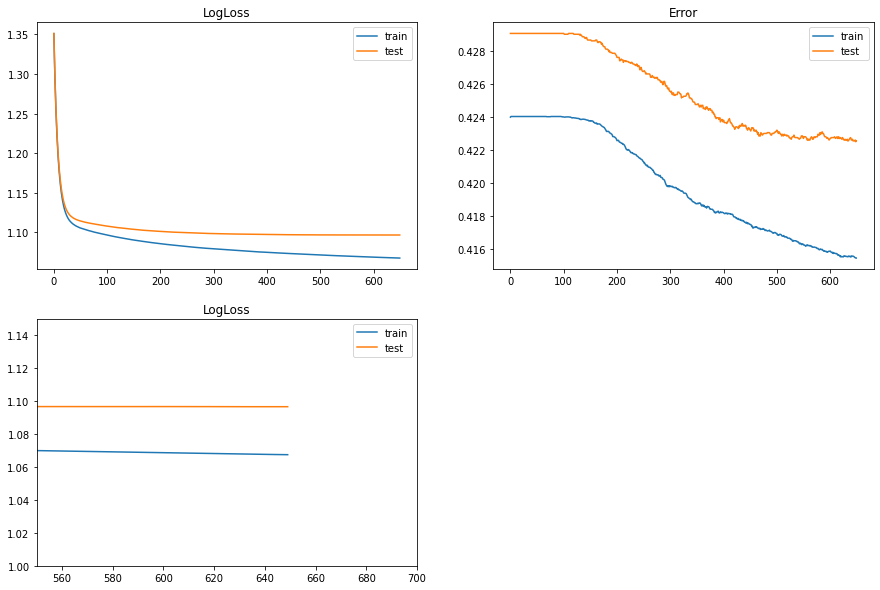

In [147]:
import matplotlib.pyplot as plt

results = model.evals_result()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes[0,0].plot(results['validation_0']['mlogloss'], label='train')
axes[0,0].plot(results['validation_1']['mlogloss'], label='test')
axes[0,0].set_title('LogLoss')
axes[0,0].legend()


axes[0,1].plot(results['validation_0']['merror'], label='train')
axes[0,1].plot(results['validation_1']['merror'], label='test')
axes[0,1].set_title('Error')
axes[0,1].legend()



axes[1,0].plot(results['validation_0']['mlogloss'], label='train')
axes[1,0].plot(results['validation_1']['mlogloss'], label='test')
axes[1,0].axis([550, 700, 1, 1.15])
axes[1,0].set_title('LogLoss')
axes[1,0].legend()

axes[1,1].set_visible(False)

#LGB Model

In [99]:
#Se convierten los datasets a un dataset de lgb
d_train=lgb.Dataset(x_train, label=y_train)

lgb_params={'learning_rate':0.2,
        'num_iterations':300,
        'boosting_type':'gbdt',
        'objective':'multiclass',
        'metric':'multi_logloss',
        'max_depth':4,
        'num_class':4
        }

LGBModel=lgb.train(lgb_params, d_train,200)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
LGBMmodel=LGBMClassifier(objective='multiclass',
                    learning_rate = 0.2,
                    max_depth = 2,
                    num_class= 4,
                    num_leaves = 60,
                    n_estimators = 500,
                    #bagging_fraction = 0.5,
                    #bagging_freq=5,
                    #feature_fraction = 0.5,
                    reg_lamda=0.14,
                    reg_alpha=1.9,
                    colsample_bytree=0.3,
                    #subsample=5,
                    #subsample_freq=0.5,
                    #min_child_samples=135,
                    #min_child_weight=2                   
                    )
LGBMmodel.fit(x_train, y_train, eval_set=eval_set)

[1]	valid_0's multi_logloss: 1.11696	valid_1's multi_logloss: 1.12358
[2]	valid_0's multi_logloss: 1.11637	valid_1's multi_logloss: 1.12299
[3]	valid_0's multi_logloss: 1.11559	valid_1's multi_logloss: 1.12222
[4]	valid_0's multi_logloss: 1.11526	valid_1's multi_logloss: 1.12184
[5]	valid_0's multi_logloss: 1.11446	valid_1's multi_logloss: 1.12109
[6]	valid_0's multi_logloss: 1.11384	valid_1's multi_logloss: 1.12058
[7]	valid_0's multi_logloss: 1.11339	valid_1's multi_logloss: 1.12011
[8]	valid_0's multi_logloss: 1.11291	valid_1's multi_logloss: 1.11973
[9]	valid_0's multi_logloss: 1.11251	valid_1's multi_logloss: 1.11933
[10]	valid_0's multi_logloss: 1.11205	valid_1's multi_logloss: 1.11887
[11]	valid_0's multi_logloss: 1.11159	valid_1's multi_logloss: 1.11851
[12]	valid_0's multi_logloss: 1.11122	valid_1's multi_logloss: 1.11826
[13]	valid_0's multi_logloss: 1.11093	valid_1's multi_logloss: 1.11802
[14]	valid_0's multi_logloss: 1.11055	valid_1's multi_logloss: 1.11772
[15]	valid_0's 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.3,
               importance_type='split', learning_rate=0.2, max_depth=2,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_class=4, num_leaves=60,
               objective='multiclass', random_state=None, reg_alpha=1.9,
               reg_lambda=0.0, reg_lamda=0.14, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

LGBMmodel.evals_result_

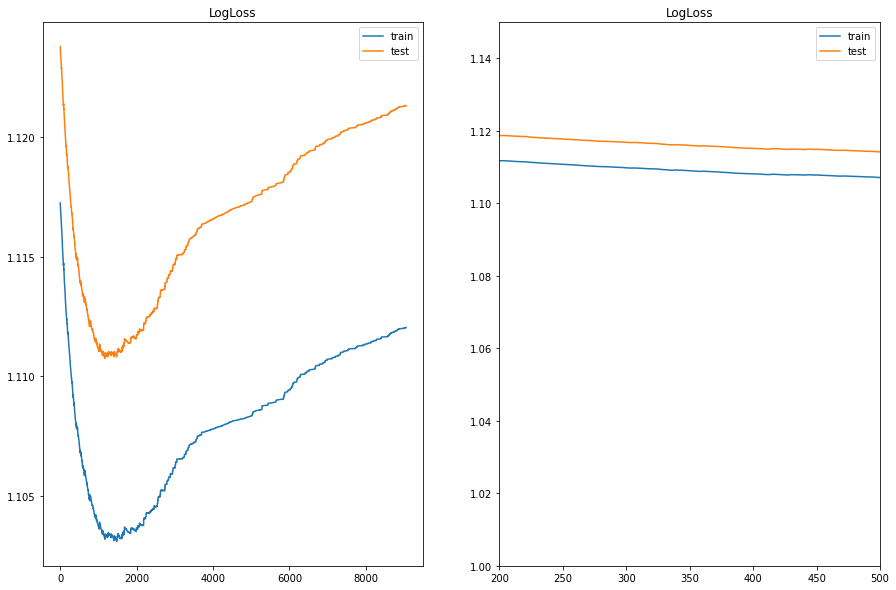

In [106]:
results = LGBMmodel.evals_result_
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

axes[0].plot(results['valid_0']['multi_logloss'], label='train')
axes[0].plot(results['valid_1']['multi_logloss'], label='test')
axes[0].set_title('LogLoss')
axes[0].legend()

axes[1].plot(results['valid_0']['multi_logloss'], label='train')
axes[1].plot(results['valid_1']['multi_logloss'], label='test')
axes[1].axis([200, 500, 1, 1.15])
axes[1].set_title('LogLoss')
axes[1].legend()

In [102]:
def objective(trial):

    
    params = {
        'reg_alpha' : trial.suggest_loguniform('reg_alpha' , 1e-5 , 10),
        'reg_lambda' : trial.suggest_loguniform('reg_lambda' , 1e-5 , 10),
        'num_leaves' : trial.suggest_int('num_leaves' , 11 , 300),
        'learning_rate' : trial.suggest_uniform('learning_rate' , 0 , 0.1),
        'max_depth' : trial.suggest_int('max_depth' , 2 , 10),
        'n_estimators' : trial.suggest_int('n_estimators' , 1 , 9999),
        'min_child_samples' : trial.suggest_int('min_child_samples' , 1 , 100),
        'min_child_weight' : trial.suggest_loguniform('min_child_weight' , 1e-5 , 1),
        'subsample' : trial.suggest_uniform('subsample' , 0 , 1.0),
        'colsample_bytree' : trial.suggest_loguniform('colsample_bytree' , 1e-5 , 1),
        'random_state' : trial.suggest_categorical('random_state' , [0,42,2021,555]),
        'objective': 'multiclass',
        'metric' : 'multi_logloss'
    }
    model = lightgbm.LGBMClassifier(**params)
    model.fit(x_train , y_train , eval_set = [(x_test , y_test)] , early_stopping_rounds = 200 , \
             verbose = False)
    preds = model.predict_proba(x_test)
    auc = log_loss(np.array(y_test) , preds)
    return auc

In [103]:
study = optuna.create_study(direction = 'minimize' , study_name = 'lgbm')
study.optimize(objective , n_trials = 50)
print('numbers of the finished trials:' , len(study.trials))
print('the best params:' , study.best_trial.params)
print('the best value:' , study.best_value)

[I 2021-05-22 22:23:10,876] A new study created in memory with name: lgbm
[I 2021-05-22 22:23:44,043] Trial 0 finished with value: 1.1022209585784268 and parameters: {'reg_alpha': 0.05170451766395453, 'reg_lambda': 0.00011791512849428921, 'num_leaves': 79, 'learning_rate': 0.07383265836396478, 'max_depth': 6, 'n_estimators': 8488, 'min_child_samples': 74, 'min_child_weight': 0.0841906967313098, 'subsample': 0.5464578040453881, 'colsample_bytree': 0.0006090617147193147, 'random_state': 555}. Best is trial 0 with value: 1.1022209585784268.
[I 2021-05-22 22:24:06,877] Trial 1 finished with value: 1.0999914612499881 and parameters: {'reg_alpha': 0.039179123035537854, 'reg_lambda': 0.02653271748608018, 'num_leaves': 239, 'learning_rate': 0.08600390361034375, 'max_depth': 2, 'n_estimators': 5940, 'min_child_samples': 77, 'min_child_weight': 0.00013130775264757027, 'subsample': 0.3283164480477633, 'colsample_bytree': 0.10652636324574995, 'random_state': 0}. Best is trial 1 with value: 1.09999

KeyboardInterrupt: ignored

In [13]:
pip install optuna


     |████████████████████████████████| 296kB 28.9MB/s 
     |████████████████████████████████| 174kB 50.1MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 143kB 38.3MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 112kB 47.4MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=3fe99dc3eecfdb58a7bee724d2cc2b4ea8176a9a5f6e7c84c784290082c7026a
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [15]:
import optuna
import lightgbm

In [104]:
params= {'reg_alpha': 8.731173067796776, 'reg_lambda': 0.00023772710606024768, 'num_leaves': 18, 'learning_rate': 0.04604099153743945, 'max_depth': 3, 'n_estimators': 9060, 'min_child_samples': 73, 'min_child_weight': 0.166554392443335, 'subsample': 0.2314919550018485, 'colsample_bytree': 0.0016606738858428085, 'random_state': 555} 
LGBMmodel=LGBMClassifier(**params)
LGBMmodel.fit(x_train, y_train, eval_set=eval_set)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[4061]	valid_0's multi_logloss: 1.10786	valid_1's multi_logloss: 1.11664
[4062]	valid_0's multi_logloss: 1.10786	valid_1's multi_logloss: 1.11664
[4063]	valid_0's multi_logloss: 1.10786	valid_1's multi_logloss: 1.11664
[4064]	valid_0's multi_logloss: 1.10785	valid_1's multi_logloss: 1.11664
[4065]	valid_0's multi_logloss: 1.10785	valid_1's multi_logloss: 1.11664
[4066]	valid_0's multi_logloss: 1.10785	valid_1's multi_logloss: 1.11664
[4067]	valid_0's multi_logloss: 1.10785	valid_1's multi_logloss: 1.11664
[4068]	valid_0's multi_logloss: 1.10786	valid_1's multi_logloss: 1.11665
[4069]	valid_0's multi_logloss: 1.10786	valid_1's multi_logloss: 1.11665
[4070]	valid_0's multi_logloss: 1.10786	valid_1's multi_logloss: 1.11665
[4071]	valid_0's multi_logloss: 1.10786	valid_1's multi_logloss: 1.11665
[4072]	valid_0's multi_logloss: 1.10786	valid_1's multi_logloss: 1.11665
[4073]	valid_0's multi_logloss: 1.10786	valid_1's multi_l

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.0016606738858428085, importance_type='split',
               learning_rate=0.04604099153743945, max_depth=3,
               min_child_samples=73, min_child_weight=0.166554392443335,
               min_split_gain=0.0, n_estimators=9060, n_jobs=-1, num_leaves=18,
               objective=None, random_state=555, reg_alpha=8.731173067796776,
               reg_lambda=0.00023772710606024768, silent=True,
               subsample=0.2314919550018485, subsample_for_bin=200000,
               subsample_freq=0)

#CatBoost

In [22]:
def objective(trial):

    
    params = {
        'learning_rate' : trial.suggest_uniform('learning_rate' , 0.4 , 0.6),
        'depth' : trial.suggest_int('depth' , 2 , 8),
        'n_estimators' : trial.suggest_int('n_estimators' , 200 , 1000),
        'l2_leaf_reg' : trial.suggest_uniform('l2_leaf_reg' , 5.0, 7.0),
        'rsm': trial.suggest_uniform('rsm', 0.5, 0.6),
        'loss_function':'MultiClass',
        'eval_metric':'MultiClass'
    }
    model = CatBoostClassifier(**params)
    model.fit(train_pool,eval_set=test_pool, early_stopping_rounds=200, verbose=False)
    preds = model.predict_proba(x_test)
    auc = log_loss(np.array(y_test) , preds)
    return auc

In [23]:
study = optuna.create_study(direction = 'minimize' , study_name = 'catboost')
study.optimize(objective , n_trials = 50) 
print('numbers of the finished trials:' , len(study.trials))
print('the best params:' , study.best_trial.params)
print('the best value:' , study.best_value)

[I 2021-05-23 00:11:55,903] A new study created in memory with name: catboost
[I 2021-05-23 00:12:31,912] Trial 0 finished with value: 1.1063136680271146 and parameters: {'learning_rate': 0.5438458306933805, 'depth': 8, 'n_estimators': 519, 'l2_leaf_reg': 3.555446615508502, 'rsm': 0.4826741288185156}. Best is trial 0 with value: 1.1063136680271146.
[I 2021-05-23 00:12:57,577] Trial 1 finished with value: 1.103226281257916 and parameters: {'learning_rate': 0.5172751282178625, 'depth': 7, 'n_estimators': 855, 'l2_leaf_reg': 4.434122450959579, 'rsm': 0.517702300576949}. Best is trial 1 with value: 1.103226281257916.
[I 2021-05-23 00:13:14,962] Trial 2 finished with value: 1.1003869742213612 and parameters: {'learning_rate': 0.4932264426339541, 'depth': 3, 'n_estimators': 273, 'l2_leaf_reg': 5.826649720938645, 'rsm': 0.5947628236876079}. Best is trial 2 with value: 1.1003869742213612.
[I 2021-05-23 00:13:41,552] Trial 3 finished with value: 1.102900587240715 and parameters: {'learning_rate

numbers of the finished trials: 50
the best params: {'learning_rate': 0.18335208570147862, 'depth': 3, 'n_estimators': 928, 'l2_leaf_reg': 6.182143898336715, 'rsm': 0.4681500291450487}
the best value: 1.0983704590603929


In [148]:
#Se convierten los datasets a un formato con el que CatBoost puede trabajar
train_pool = Pool(data=x_train, label=y_train.values)
test_pool = Pool(data=x_test, label=y_test.values) 

In [54]:
params= {'learning_rate': 0.19,
         'depth': 2,
         'n_estimators': 928,
         'l2_leaf_reg': 6.182143898336715,
         'rsm': 0.4681500291450487,
         'loss_function':'MultiClass',
         'eval_metric':'MultiClass',
         'verbose':True
         }
CBModel = CatBoostClassifier(**params)


CBModel.fit(train_pool,eval_set=test_pool)



0:	learn: 1.2834368	test: 1.2850685	best: 1.2850685 (0)	total: 62.5ms	remaining: 57.9s
1:	learn: 1.2248465	test: 1.2275169	best: 1.2275169 (1)	total: 113ms	remaining: 52.3s
2:	learn: 1.1884123	test: 1.1919414	best: 1.1919414 (2)	total: 168ms	remaining: 51.9s
3:	learn: 1.1647607	test: 1.1689061	best: 1.1689061 (3)	total: 223ms	remaining: 51.5s
4:	learn: 1.1484351	test: 1.1529979	best: 1.1529979 (4)	total: 278ms	remaining: 51.3s
5:	learn: 1.1379222	test: 1.1428578	best: 1.1428578 (5)	total: 330ms	remaining: 50.7s
6:	learn: 1.1308356	test: 1.1360749	best: 1.1360749 (6)	total: 382ms	remaining: 50.2s
7:	learn: 1.1257473	test: 1.1311894	best: 1.1311894 (7)	total: 433ms	remaining: 49.8s
8:	learn: 1.1220265	test: 1.1278113	best: 1.1278113 (8)	total: 497ms	remaining: 50.7s
9:	learn: 1.1197317	test: 1.1256295	best: 1.1256295 (9)	total: 546ms	remaining: 50.1s
10:	learn: 1.1180337	test: 1.1240874	best: 1.1240874 (10)	total: 599ms	remaining: 49.9s
11:	learn: 1.1164488	test: 1.1225555	best: 1.122555

KeyboardInterrupt: ignored

In [159]:
CBModel = CatBoostClassifier(
    learning_rate=0.503,
    depth=1,
    l2_leaf_reg =  5.75,
    n_estimators=2000,
    rsm=0.5497,

    loss_function='MultiClass',
    eval_metric='MultiClass',
    verbose=True
)

CBModel.fit(train_pool,eval_set=test_pool)


0:	learn: 1.1681245	test: 1.1723418	best: 1.1723418 (0)	total: 54.6ms	remaining: 1m 49s
1:	learn: 1.1320237	test: 1.1374487	best: 1.1374487 (1)	total: 98.6ms	remaining: 1m 38s
2:	learn: 1.1203577	test: 1.1266983	best: 1.1266983 (2)	total: 143ms	remaining: 1m 35s
3:	learn: 1.1157974	test: 1.1222505	best: 1.1222505 (3)	total: 192ms	remaining: 1m 35s
4:	learn: 1.1142555	test: 1.1212587	best: 1.1212587 (4)	total: 252ms	remaining: 1m 40s
5:	learn: 1.1135450	test: 1.1209173	best: 1.1209173 (5)	total: 300ms	remaining: 1m 39s
6:	learn: 1.1126790	test: 1.1199902	best: 1.1199902 (6)	total: 350ms	remaining: 1m 39s
7:	learn: 1.1115573	test: 1.1191688	best: 1.1191688 (7)	total: 392ms	remaining: 1m 37s
8:	learn: 1.1109495	test: 1.1187591	best: 1.1187591 (8)	total: 440ms	remaining: 1m 37s
9:	learn: 1.1105018	test: 1.1183842	best: 1.1183842 (9)	total: 482ms	remaining: 1m 36s
10:	learn: 1.1101855	test: 1.1181259	best: 1.1181259 (10)	total: 540ms	remaining: 1m 37s
11:	learn: 1.1097320	test: 1.1177164	be

#Predicciones

Test Partition


In [160]:
#Predicciones con particion de pueba y log_loss
y_xgbpred = model.predict_proba(x_test)
#y_lgbpred=LGBMmodel.predict_proba(x_test)
y_Catpred = CBModel.predict_proba(x_test)
print('log_loss xgboost:  ', log_loss(np.array(y_test), y_xgbpred))
#print('log_loss LGBM: ', log_loss(np.array(y_test), y_lgbpred))
print('log_loss CatBoost: ', log_loss(np.array(y_test), y_Catpred))  
#guardar submission 0.9861 catboost

log_loss xgboost:   1.096581387513876
log_loss CatBoost:  1.0979431947849683


Test Dataset

In [163]:
#Predicciones con dataset de pureba
test_matrix = xgb.DMatrix(test_data)
y_xgbpred = model.predict_proba(test_data)

#y_lgbpred=LGBMmodel.predict(test_data)

y_Catpred = CBModel.predict_proba(test_data)

#Model Combination

In [164]:
#Se combinan los modelos al realizar un promedio de sus predicciones
preds_combined = (y_xgbpred + y_Catpred)/2
preds_combined = np.clip(preds_combined,0.05, 0.95)
combined_data = pd.DataFrame(preds_combined,columns=['Class_1','Class_2','Class_3','Class_4'])
combined_data['id'] = test_data['id']
combined_data = combined_data[['id','Class_1','Class_2','Class_3','Class_4']]
combined_data

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.089412,0.636207,0.165401,0.108979
1,100001,0.076077,0.698164,0.143247,0.082513
2,100002,0.084573,0.665513,0.161479,0.088435
3,100003,0.082713,0.537120,0.299306,0.080861
4,100004,0.080055,0.627742,0.178671,0.113532
...,...,...,...,...,...
49995,149995,0.092859,0.675860,0.176464,0.054816
49996,149996,0.071996,0.658746,0.131507,0.137751
49997,149997,0.080744,0.533606,0.218677,0.166973
49998,149998,0.081602,0.580125,0.166613,0.171660


#Log Loss

In [162]:
from sklearn.metrics import log_loss
log_loss(np.array(y_test), preds_combined)

1.0965673161668885

#Export to CSV

In [165]:
submission = pd.DataFrame(preds_combined, columns=['Class_1','Class_2','Class_3','Class_4'])
submission['id'] = test_data['id']
combined_data.to_csv("submission.csv", index = False)